In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import us
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
read1=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2016-12-31&minmagnitude=4&limit=20000")
read2=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2017-01-01&endtime=2017-12-31&minmagnitude=4&limit=20000")
read3=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2018-01-01&endtime=2018-12-31&minmagnitude=4&limit=20000")
read4=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2019-01-01&endtime=2019-10-01&minmagnitude=4&limit=20000")
df= pd.concat([read1,read2,read3,read4],axis=0)

 question 1: Use describe to get the basic statistics of all the columns 

In [3]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,52887.000000,52887.000000,52887.000000,52887.000000,399.000000,52039.000000,51994.000000,52887.000000,52445.000000,52887.000000,51111.000000,51314.000000
mean,1.919573,33.871955,94.093153,4.527226,44.784461,110.642594,3.707592,0.826574,8.743910,5.446265,0.121050,42.242312
std,28.957996,124.365103,147.825720,0.398573,33.195457,51.058646,4.734222,0.263079,3.661015,4.203604,0.065051,61.356488
min,-79.983700,-179.998600,-1.010000,4.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.487300,-74.501800,10.000000,4.300000,23.000000,73.000000,1.170000,0.650000,6.300000,1.900000,0.073000,12.000000
50%,-3.314000,93.835300,33.700000,4.500000,36.000000,105.000000,2.379000,0.810000,8.200000,4.800000,0.112000,21.000000
75%,24.315950,141.894850,105.975000,4.700000,61.500000,142.000000,4.395000,0.990000,10.800000,7.900000,0.153000,45.000000
max,86.996400,179.999300,690.950000,8.200000,289.000000,346.000000,62.626000,2.530000,51.700000,69.300000,1.000000,941.000000


Question 2: Get the top 10 earthquakes by magnitude 

In [4]:
df.sort_values(by=['mag'],ascending=False).head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
4490,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,2019-09-12T03:25:23.535Z,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us
6200,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,...,2019-08-19T06:18:42.402Z,"286km NNE of Ndoi Island, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us
4534,2019-05-26T07:41:15.073Z,-5.8119,-75.2697,122.57,8.0,mww,NaN,17.0,3.180,0.84,...,2019-10-20T00:29:23.662Z,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us
13767,2018-01-23T09:31:40.890Z,56.0039,-149.1658,14.06,7.9,mww,NaN,30.0,2.585,0.77,...,2019-07-01T15:34:15.502Z,"280km SE of Kodiak, Alaska",earthquake,6.0,2.8,0.034,81.0,reviewed,us,us
5112,2018-09-06T15:49:18.710Z,-18.4743,179.3502,670.81,7.9,mww,NaN,12.0,1.431,1.07,...,2019-04-23T04:45:27.592Z,"102km ESE of Suva, Fiji",earthquake,9.5,2.8,0.025,157.0,reviewed,us,us
12276,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,...,2018-10-17T21:53:19.164Z,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us
771,2016-12-17T10:51:10.500Z,-4.5049,153.5216,94.54,7.9,mww,NaN,13.0,1.389,0.97,...,2018-10-17T21:50:55.380Z,"54km E of Taron, Papua New Guinea",earthquake,7.3,3.8,NaN,NaN,reviewed,us,us
11266,2016-04-16T23:58:36.980Z,0.3819,-79.9218,20.59,7.8,mww,NaN,15.0,1.440,0.94,...,2019-10-15T14:06:57.770Z,"27km SSE of Muisne, Ecuador",earthquake,5.7,3.2,NaN,NaN,reviewed,us,us
1317,2016-12-08T17:38:46.280Z,-10.6812,161.3273,40.00,7.8,mww,NaN,13.0,1.836,0.88,...,2018-10-17T21:50:46.404Z,"69km WSW of Kirakira, Solomon Islands",earthquake,8.3,1.8,NaN,NaN,reviewed,us,us
13075,2016-03-02T12:49:48.110Z,-4.9521,94.3299,24.00,7.8,mww,NaN,20.0,7.009,1.14,...,2018-12-04T22:30:13.007Z,"Southwest of Sumatra, Indonesia",earthquake,7.5,1.8,NaN,NaN,reviewed,us,us


 question 3: Handle all Null/empty data by filling it with zeros

In [5]:
df = df.fillna(0)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

Question 4: Find the top 10 places where the strongest earthquakes occurred 

In [6]:
df.sort_values(by=['mag'],ascending=True)['place'].apply(lambda x: x[x.index("of ")+3:] if "of " in x else x ).head(10)

6267              San Pedro de Atacama, Chile
3030                Owen Fracture Zone region
4430                             Akita, Japan
6796     New Britain region, Papua New Guinea
3037                        Colchani, Bolivia
13145                   Amukta Island, Alaska
2517                        Jarm, Afghanistan
8191                       Port Hardy, Canada
6832                   Kawangohari, Indonesia
13127                    Shughnon, Tajikistan
Name: place, dtype: object

Question 5: Find the top 10 places where the weakest earthquakes occurred 

In [7]:
df.sort_values(by=['mag'],ascending=False)['place'].apply(lambda x: x[x.index("of ")+3:] if "of " in x else x ).head(10)

4490            Tres Picos, Mexico
6200             Ndoi Island, Fiji
4534                 Lagunas, Peru
13767               Kodiak, Alaska
5112                    Suva, Fiji
12276    Panguna, Papua New Guinea
771        Taron, Papua New Guinea
11266              Muisne, Ecuador
1317     Kirakira, Solomon Islands
13075           Sumatra, Indonesia
Name: place, dtype: object

Question 6: On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges:  Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. 

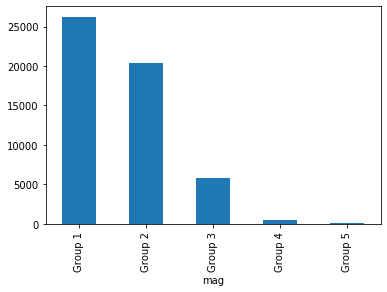

In [8]:
bins= [4,4.5,5,6,7,10]
labels= ["Group 1","Group 2","Group 3","Group 4", "Group 5"]
bar = df['mag'].groupby(pd.cut(df['mag'], bins=bins, labels=labels, right=False)).count()
bar.plot(kind='bar')


Question 7: Find the 10 countries with the highest number of earthquakes

In [9]:
df['country']=df['place'].apply(lambda x: x[x.index(", ")+2:] if ", " in x else x )
df.groupby('country').count().sort_values(by=['mag'],ascending=False)['mag'].head(10)

country
Indonesia           6553
Japan               3413
Papua New Guinea    3084
Fiji                2524
New Zealand         2389
Chile               2284
Philippines         2083
Alaska              1834
Russia              1756
Tonga               1563
Name: mag, dtype: int64

Question 8: Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see? 

(array([2.6224e+04, 1.7971e+04, 5.9590e+03, 1.6890e+03, 6.5400e+02,
        2.6300e+02, 7.8000e+01, 2.8000e+01, 1.0000e+01, 1.1000e+01]),
 array([4.  , 4.42, 4.84, 5.26, 5.68, 6.1 , 6.52, 6.94, 7.36, 7.78, 8.2 ]),
 <a list of 10 Patch objects>)

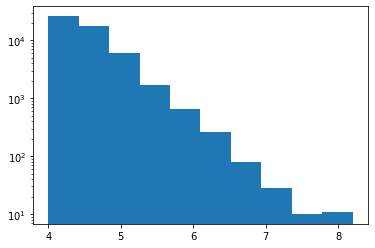

In [10]:
plt.hist(df['mag'], log=True) 


Question 9:  Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see

(array([36008.,  6559.,  3799.,  1494.,   448.,   528.,   489.,  1688.,
         1655.,   219.]),
 array([ -1.01 ,  68.186, 137.382, 206.578, 275.774, 344.97 , 414.166,
        483.362, 552.558, 621.754, 690.95 ]),
 <a list of 10 Patch objects>)

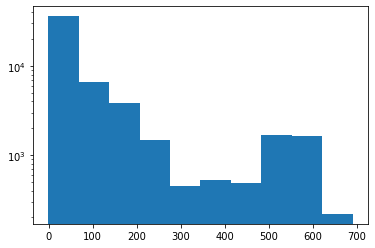

In [11]:
plt.hist(df['depth'], log=True) 


Question 10: Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

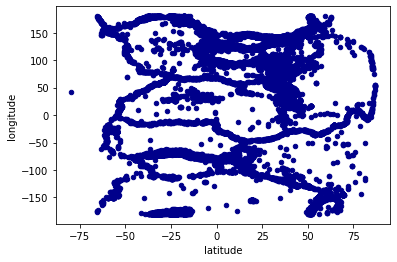

In [12]:
df.plot.scatter(x='latitude',y='longitude',c='DarkBlue')

# Graduate Student Questions

Question 11:  Using the US package (https://pypi.org/project/us/), clean the dataset you used previously to only have data from the US

In [13]:
def get_state(item):
    return us.states.lookup(item) 
df['state_usa']=df['country'].map(get_state)
df2=df[df.state_usa.notnull()]

Question 12: Find the top 10 US states where the strongest earthquakes occurred (10 points) b) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. Please add labels and colors to the plot. c) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Overlay a US map on top of this plot to match the locations. Please add labels and colors to the plot

In [14]:
## 12 a
df2.sort_values(by=['mag'],ascending=False)['state_usa'].head(10)

13767                      Alaska
7093     Northern Mariana Islands
14521                      Alaska
1408                       Alaska
9994                       Hawaii
7813                       Alaska
1324                   California
3099                       Alaska
6332                       Alaska
6437                       Alaska
Name: state_usa, dtype: object

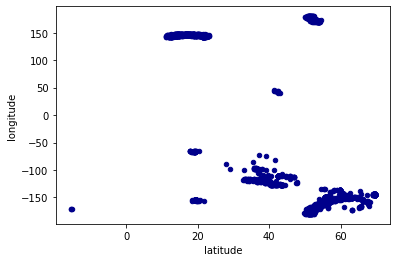

In [15]:
## 12 c
df2.plot.scatter(x='latitude',y='longitude',c='DarkBlue')

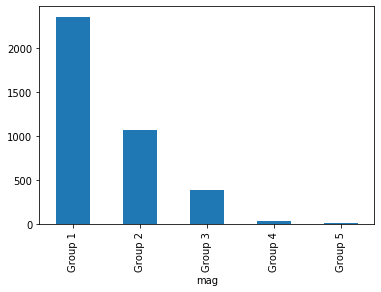

In [16]:
## 12 b
bar2 = df2['mag'].groupby(pd.cut(df2['mag'], bins=bins, labels=labels, right=False)).count()
bar2.plot(kind='bar')